In [1]:
pip install ultralytics opencv-python numpy matplotlib scikit-learn torch torchvision torchaudio 


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import tkinter as tk
from tkinter import filedialog, ttk, messagebox
from PIL import Image, ImageTk
from ultralytics import YOLO
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import threading
import torch
from collections import defaultdict
from PIL import Image, ImageTk
import csv
import os
import datetime
import time

# Device Check
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Training on: {device}")

Training on: cuda


In [7]:
# TRAINING

# Train YOLOv8 Model
model = YOLO("yolov8n.pt")  # YOLOv8 nano model
model.train(
    data="C:/Users/MARC/Downloads/fruits_dataset2.v2i.yolov8/data.yaml",  # Dataset configuration
    epochs=30,
    imgsz=320,
    batch=16,
    device=device,
    name="fruit_vision",
    lr0=0.001,
    optimizer="SGD",
    amp=False,
    val=True,
)

Ultralytics 8.3.40  Python-3.11.0 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/MARC/Downloads/fruits_dataset2.v2i.yolov8/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=fruit_vision, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning C:\Users\MARC\Downloads\fruits_dataset2.v2i.yolov8\train\labels.cache... 2547 images, 12 backgrounds, 0 corrupt: 100%|██████████| 2547/2547 [00:00<?, ?it/s]
val: Scanning C:\Users\MARC\Downloads\fruits_dataset2.v2i.yolov8\valid\labels.cache... 245 images, 1 backgrounds, 0 corrupt: 100%|██████████| 245/245 [00:00<?, ?it/s]


Plotting labels to runs\detect\fruit_vision\labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs\detect\fruit_vision
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.06G     0.9296      3.355       1.11         32        320: 100%|██████████| 160/160 [01:36<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  2.00s/it]

                   all        245       1155       0.41      0.345      0.292      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.05G     0.9036      1.924      1.056         42        320: 100%|██████████| 160/160 [01:39<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


                   all        245       1155      0.748      0.795      0.831      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.04G     0.8593      1.229       1.03         29        320: 100%|██████████| 160/160 [00:57<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        245       1155      0.861      0.944      0.922      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.04G     0.8248     0.9705      1.012         17        320: 100%|██████████| 160/160 [01:43<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]

                   all        245       1155      0.955      0.965      0.959      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.04G      0.797     0.8551     0.9931         24        320: 100%|██████████| 160/160 [01:22<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]

                   all        245       1155       0.96      0.969      0.962      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.04G      0.782     0.8126     0.9889         24        320: 100%|██████████| 160/160 [01:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.26s/it]

                   all        245       1155      0.962      0.973      0.971      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.05G     0.7718     0.7822     0.9873         25        320: 100%|██████████| 160/160 [02:48<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        245       1155      0.959      0.973      0.969      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.04G     0.7621     0.7526     0.9814         31        320: 100%|██████████| 160/160 [02:33<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.59s/it]

                   all        245       1155      0.962      0.977      0.974      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.04G     0.7517     0.7331      0.979         29        320: 100%|██████████| 160/160 [01:47<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]

                   all        245       1155      0.964      0.977      0.972      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.04G       0.75     0.7135     0.9787         38        320: 100%|██████████| 160/160 [01:22<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:42<00:00,  5.37s/it]

                   all        245       1155      0.969      0.974      0.974      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.04G     0.7443     0.6936     0.9777         28        320: 100%|██████████| 160/160 [03:07<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        245       1155      0.961       0.98      0.972       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.04G     0.7396     0.6778     0.9753         22        320: 100%|██████████| 160/160 [01:29<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.88s/it]


                   all        245       1155      0.967       0.98      0.974      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.04G     0.7344     0.6728     0.9733         31        320: 100%|██████████| 160/160 [01:36<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.69s/it]

                   all        245       1155      0.965      0.974      0.975      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.04G     0.7287     0.6683     0.9712         33        320: 100%|██████████| 160/160 [01:36<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.77s/it]

                   all        245       1155      0.967      0.981      0.977      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.04G     0.7303     0.6516     0.9726         25        320: 100%|██████████| 160/160 [02:04<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        245       1155      0.966      0.983      0.979      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.04G     0.7231     0.6528     0.9703         12        320: 100%|██████████| 160/160 [01:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.84s/it]

                   all        245       1155      0.966      0.982      0.977      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.04G     0.7153     0.6449     0.9667         23        320: 100%|██████████| 160/160 [01:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.22s/it]

                   all        245       1155      0.969      0.981      0.977      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.06G     0.7097     0.6376     0.9672         39        320: 100%|██████████| 160/160 [03:36<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]

                   all        245       1155      0.966      0.983      0.977      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.04G     0.7194     0.6284     0.9701         22        320: 100%|██████████| 160/160 [01:07<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]

                   all        245       1155      0.968      0.983      0.979      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.04G     0.7084     0.6212     0.9649         35        320: 100%|██████████| 160/160 [01:18<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.83s/it]

                   all        245       1155      0.968      0.983      0.978      0.842


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.04G     0.6071     0.5902     0.9229         10        320: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<00:00,  2.12s/it]

                   all        245       1155      0.967      0.982      0.981      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.04G     0.6016     0.5691     0.9221         15        320: 100%|██████████| 160/160 [01:54<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.76s/it]

                   all        245       1155      0.969      0.982      0.983      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.04G     0.5949     0.5576     0.9155         13        320: 100%|██████████| 160/160 [01:38<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]

                   all        245       1155      0.968      0.982      0.983      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.04G     0.5888     0.5479      0.916         14        320: 100%|██████████| 160/160 [01:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.99s/it]


                   all        245       1155      0.968      0.982      0.982      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.04G     0.5857     0.5428      0.907         14        320: 100%|██████████| 160/160 [01:59<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:23<00:00,  2.90s/it]

                   all        245       1155      0.968      0.979      0.982      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.04G     0.5786     0.5397      0.911         15        320: 100%|██████████| 160/160 [03:11<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:28<00:00,  3.54s/it]


                   all        245       1155       0.97       0.98      0.983      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.04G     0.5765      0.535       0.91         15        320: 100%|██████████| 160/160 [02:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


                   all        245       1155       0.97       0.98      0.983       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.04G     0.5737     0.5302     0.9064         13        320: 100%|██████████| 160/160 [02:08<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        245       1155       0.97       0.98      0.983      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.04G     0.5735     0.5274     0.9086         14        320: 100%|██████████| 160/160 [00:58<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        245       1155       0.97       0.98      0.983      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.04G     0.5687     0.5246     0.9077         15        320: 100%|██████████| 160/160 [00:58<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        245       1155      0.969       0.98      0.983      0.853



30 epochs completed in 1.102 hours.
Optimizer stripped from runs\detect\fruit_vision\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\fruit_vision\weights\best.pt, 6.2MB

Validating runs\detect\fruit_vision\weights\best.pt...
Ultralytics 8.3.40  Python-3.11.0 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


                   all        245       1155       0.97       0.98      0.983      0.855
                 apple        126        164      0.987          1      0.987      0.863
                banana        202        320      0.981      0.994      0.988      0.826
          dragon fruit        133        133      0.991      0.992       0.99      0.801
                 guava         81         99      0.955      0.939      0.971      0.861
                orange        106        108      0.971      0.991      0.987      0.895
                  pear         78         81      0.938      0.941      0.959      0.877
             pineapple        102        102      0.953      0.989      0.988      0.878
           sugar apple        148        148      0.985      0.993      0.994       0.84
Speed: 1.7ms preprocess, 5.4ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs\detect\fruit_vision


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000176CC25B110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047

In [22]:
# Directory for storing logs
log_file_path = "detection_logs.csv"

# Ensure log file exists
if not os.path.exists(log_file_path):
    with open(log_file_path, "w", newline="") as log_file:
        writer = csv.writer(log_file)
        writer.writerow(["Timestamp", "File Type", "File Path", "Detected Fruits"])

# Load Trained YOLO Model
trained_model = YOLO("D:/Computer Vision/runs/detect/fruit_vision/weights/best.pt")

# GUI Setup
root = tk.Tk()
root.title("FRUITVISION")
root.geometry("1600x900")  # Increased window size to accommodate all components
root.configure(bg="#2b2b2b")

# Title Label
title_label = tk.Label(
    root, text="FRUITVISION", font=("Arial", 40, "bold"), fg="white", bg="#2b2b2b"
)
title_label.pack(pady=10)

# Instruction Label
instruction_label = tk.Label(
    root,
    text="Upload an image, video, or use the webcam for real-time detection.\nPress 'Q' to stop the video or webcam.",
    font=("Arial", 16),
    fg="white",
    bg="#2b2b2b",
)
instruction_label.pack(pady=10)

# Maximum Detected Fruits Label
max_fruit_label = tk.Label(
    root,
    text="Maximum Detected Fruits: None",
    font=("Arial", 18, "bold"),
    fg="white",
    bg="#2b2b2b",
)
max_fruit_label.pack(pady=10)

# Scrollable Counter Panel
counter_frame = tk.Frame(root, bg="#2b2b2b")
counter_frame.pack(pady=20, padx=20, fill="both", expand=True)

canvas = tk.Canvas(counter_frame, bg="#2b2b2b", highlightthickness=0)
scrollbar = ttk.Scrollbar(counter_frame, orient="vertical", command=canvas.yview)
scrollable_counter = tk.Frame(canvas, bg="#2b2b2b")

scrollable_counter.bind(
    "<Configure>",
    lambda e: canvas.configure(scrollregion=canvas.bbox("all")),
)

canvas.create_window((0, 0), window=scrollable_counter, anchor="nw")
canvas.configure(yscrollcommand=scrollbar.set)

canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")

# Buttons Panel
button_frame = tk.Frame(root, bg="#2b2b2b")
button_frame.pack(fill="x", pady=10)

# Fruit Classes and Tracking
fruit_classes = [
    "apple", "banana", "dragon fruit", "guava",
    "orange", "pear", "pineapple", "sugar apple"
]
max_counts = defaultdict(int)
fruit_widgets = {}

# Confidence Slider
confidence_slider_label = tk.Label(
    root, text="Confidence Threshold", font=("Arial", 16), fg="white", bg="#2b2b2b"
)
confidence_slider_label.pack(pady=5)

confidence_slider = tk.Scale(
    root,
    from_=0.1,
    to=1.0,
    resolution=0.01,
    orient="horizontal",
    length=500,
    sliderlength=20,
    width=15,
    bg="#2b2b2b",
    fg="white",
    activebackground="#007ACC",
)
confidence_slider.set(0.25)  # Default confidence threshold
confidence_slider.pack(pady=10)

# Class Selection (Filter results by specific classes)
class_selection_label = tk.Label(
    root, text="Fruits to be Tracked", font=("Arial", 16), fg="white", bg="#2b2b2b"
)
class_selection_label.pack(pady=5)

class_selection_listbox = tk.Listbox(
    root, 
    selectmode=tk.MULTIPLE,  # Allow multiple selections
    height=6,  # Adjust height as needed
    font=("Arial", 14),
    bg="#333333",
    fg="white",
    selectbackground="#007ACC"
)
for fruit in fruit_classes:
    class_selection_listbox.insert(tk.END, fruit)

class_selection_listbox.pack(pady=10)

# Helper Functions
def reset_fruit_counter():
    """Reset the GUI fruit counter and tracking."""
    global fruit_widgets, max_counts
    fruit_widgets.clear()
    max_counts.clear()

    for widget in scrollable_counter.winfo_children():
        widget.destroy()

    max_fruit_label.config(text="Maximum Detected Fruits: None")

def update_fruit_counter(fruit_counts):
    """Update the GUI with fruit counts dynamically."""
    for fruit, count in fruit_counts.items():
        if fruit not in fruit_widgets:
            fruit_frame = tk.Frame(scrollable_counter, bg="#2b2b2b", pady=5)
            fruit_frame.pack(fill="x", padx=10)

            fruit_label = tk.Label(
                fruit_frame,
                text=fruit,
                font=("Arial", 14, "bold"),
                fg="white",
                bg="#2b2b2b",
                anchor="w",
            )
            fruit_label.pack(side="left", padx=10)

            progress = ttk.Progressbar(
                fruit_frame,
                orient="horizontal",
                mode="determinate",
                length=200,
            )
            progress.pack(side="left", padx=10)

            count_label = tk.Label(
                fruit_frame,
                text=f"Count: {count}",
                font=("Arial", 12),
                fg="white",
                bg="#2b2b2b",
            )
            count_label.pack(side="left", padx=10)

            fruit_widgets[fruit] = {"progress": progress, "count_label": count_label}

        fruit_widgets[fruit]["progress"]["value"] = count
        fruit_widgets[fruit]["count_label"].config(text=f"Count: {count}")
        max_counts[fruit] = max(max_counts[fruit], count)

    max_fruit_label.config(
        text=f"Maximum Detected Fruits: {', '.join([f'{fruit}: {count}' for fruit, count in max_counts.items()])}"
    )

def log_detection(file_type, file_path, detected_fruits):
    """Log file detections."""
    with open(log_file_path, "a", newline="") as log_file:
        writer = csv.writer(log_file)
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        writer.writerow([timestamp, file_type, file_path, detected_fruits])

def view_logs():
    """View detection logs."""
    if not os.path.exists(log_file_path):
        messagebox.showinfo("Logs", "No logs available.")
        return

    with open(log_file_path, "r") as log_file:
        log_data = log_file.readlines()

    if len(log_data) <= 1:
        messagebox.showinfo("Logs", "No logs available.")
        return

    log_window = tk.Toplevel(root)
    log_window.title("Detection Logs")
    log_window.geometry("800x600")

    log_text = tk.Text(log_window, wrap="word")
    log_text.pack(expand=True, fill="both")

    for line in log_data:
        log_text.insert("end", line)

    # Clear Logs Button
    def clear_logs():
        with open(log_file_path, "w", newline="") as log_file:
            writer = csv.writer(log_file)
            writer.writerow(["Timestamp", "File Type", "File Path", "Detected Fruits"])
        log_text.delete(1.0, "end")
        messagebox.showinfo("Logs", "Logs have been cleared.")

    clear_logs_button = tk.Button(
        log_window, text="Clear Logs", font=("Arial", 14), bg="#ff0000", fg="white", command=clear_logs
    )
    clear_logs_button.pack(pady=10)

def process_image(file_path):
    """Process and display an image."""
    reset_fruit_counter()
    frame = cv2.imread(file_path)
    confidence_threshold = confidence_slider.get()
    results = trained_model.predict(frame, imgsz=640, iou=0.7, conf=confidence_threshold)
    predictions = results[0].boxes

    fruit_counts = defaultdict(int)
    selected_fruits = [class_selection_listbox.get(i) for i in class_selection_listbox.curselection()]

    for box in predictions:
        class_id = int(box.cls)
        fruit_name = fruit_classes[class_id]
        if not selected_fruits or fruit_name in selected_fruits:
            fruit_counts[fruit_name] += 1

    update_fruit_counter(fruit_counts)

    detected_fruits = ", ".join([f"{fruit}: {count}" for fruit, count in fruit_counts.items()])
    log_detection("Image", file_path, detected_fruits)

    # Annotate and display the frame
    annotated_frame = results[0].plot()
    
    # Convert BGR to RGB
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    
    # Convert to ImageTk format
    annotated_image = ImageTk.PhotoImage(image=Image.fromarray(annotated_frame_rgb))
    
    # Create a new window for the result
    result_window = tk.Toplevel(root)
    result_window.title("Detection Result")
    result_label = tk.Label(result_window, image=annotated_image)
    result_label.image = annotated_image  # Keep a reference to avoid garbage collection
    result_label.pack()

def process_video_or_webcam(source):
    """Process video or webcam with FPS and latency calculations."""
    reset_fruit_counter()
    cap = cv2.VideoCapture(source)

    max_fruit_counts = defaultdict(int)
    fps_label = tk.Label(
        root, text="FPS: Calculating...", font=("Arial", 16), fg="white", bg="#2b2b2b"
    )
    fps_label.pack(pady=5)

    latency_label = tk.Label(
        root, text="Latency: Calculating...", font=("Arial", 16), fg="white", bg="#2b2b2b"
    )
    latency_label.pack(pady=5)

    prev_time = 0  # Time of previous frame
    total_frames = 0

    while cap.isOpened():
        start_time = time.time()  # Start measuring latency
        ret, frame = cap.read()
        if not ret:
            break

        confidence_threshold = confidence_slider.get()
        results = trained_model.predict(frame, imgsz=640, iou=0.7, conf=confidence_threshold)
        predictions = results[0].boxes

        frame_fruit_counts = defaultdict(int)
        selected_fruits = [class_selection_listbox.get(i) for i in class_selection_listbox.curselection()]

        for box in predictions:
            class_id = int(box.cls)
            fruit_name = fruit_classes[class_id]
            if not selected_fruits or fruit_name in selected_fruits:
                frame_fruit_counts[fruit_name] += 1

        update_fruit_counter(frame_fruit_counts)

        for fruit, count in frame_fruit_counts.items():
            max_fruit_counts[fruit] = max(max_fruit_counts[fruit], count)

        annotated_frame = results[0].plot()

        # Calculate and update FPS
        curr_time = time.time()
        fps = 1 / (curr_time - prev_time) if prev_time else 0
        prev_time = curr_time
        fps_label.config(text=f"FPS: {fps:.2f}")

        # Calculate and update latency
        latency = time.time() - start_time
        latency_label.config(text=f"Latency: {latency:.2f} seconds")

        cv2.imshow("Detection", annotated_frame)
        total_frames += 1

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    detected_fruits = ", ".join([f"{fruit}: {count}" for fruit, count in max_fruit_counts.items()])
    log_detection("Video/Webcam", source, detected_fruits)

    cap.release()
    cv2.destroyAllWindows()

def upload_images():
    file_paths = filedialog.askopenfilenames(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
    for file_path in file_paths:
        log_detection("Image", file_path, "N/A")  # Initial log entry
        process_image(file_path)

def upload_video():
    file_path = filedialog.askopenfilename(filetypes=[("Video Files", "*.mp4;*.avi;*.mov")])
    log_detection("Video", file_path, "N/A")  # Initial log entry
    process_video_or_webcam(file_path)

def use_webcam():
    log_detection("Webcam", "Real-time Webcam", "N/A")  # Initial log entry
    process_video_or_webcam(0)

# Buttons for uploading images, videos, and webcam usage
upload_images_button = tk.Button(
    button_frame, text="Upload Image", font=("Arial", 18), command=upload_images
)
upload_images_button.pack(side="left", padx=20)

upload_video_button = tk.Button(
    button_frame, text="Upload Video", font=("Arial", 18), command=upload_video
)
upload_video_button.pack(side="left", padx=20)

use_webcam_button = tk.Button(
    button_frame, text="Use Webcam", font=("Arial", 18), command=use_webcam
)
use_webcam_button.pack(side="left", padx=20)

# View logs button
view_logs_button = tk.Button(
    button_frame, text="View Logs", font=("Arial", 18), command=view_logs
)
view_logs_button.pack(side="left", padx=20)


In [23]:
# Start GUI
root.mainloop()


0: 384x640 (no detections), 22.0ms
Speed: 3.0ms preprocess, 22.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.0ms
Speed: 4.0ms preprocess, 39.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms
Speed: 3.0ms preprocess, 26.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.0ms
Speed: 3.0ms preprocess, 22.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.0ms
Speed: 3.0ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.0ms
Speed: 1.0ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 17.0ms
Speed: 2.0ms preprocess, 17.0ms i

Ultralytics 8.3.40  Python-3.11.0 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)


val: Scanning C:\Users\MARC\Downloads\fruits_dataset2.v2i.yolov8\valid\labels.cache... 245 images, 1 backgrounds, 0 corrupt: 100%|██████████| 245/245 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]


                   all        245       1155       0.97       0.98      0.983      0.855
                 apple        126        164      0.987          1      0.987      0.863
                banana        202        320      0.981      0.994      0.988      0.826
          dragon fruit        133        133      0.991      0.992       0.99      0.801
                 guava         81         99      0.955      0.939      0.971      0.861
                orange        106        108      0.971      0.991      0.987      0.895
                  pear         78         81      0.938      0.941      0.959      0.877
             pineapple        102        102      0.953      0.989      0.988      0.878
           sugar apple        148        148      0.985      0.993      0.994       0.84
Speed: 0.5ms preprocess, 6.6ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs\detect\val11
mAP@0.5: 0.9830
mAP@0.5:0.95: 0.8551
Precision: 0.9702
Recall: 0.9800
F1 Score (Me

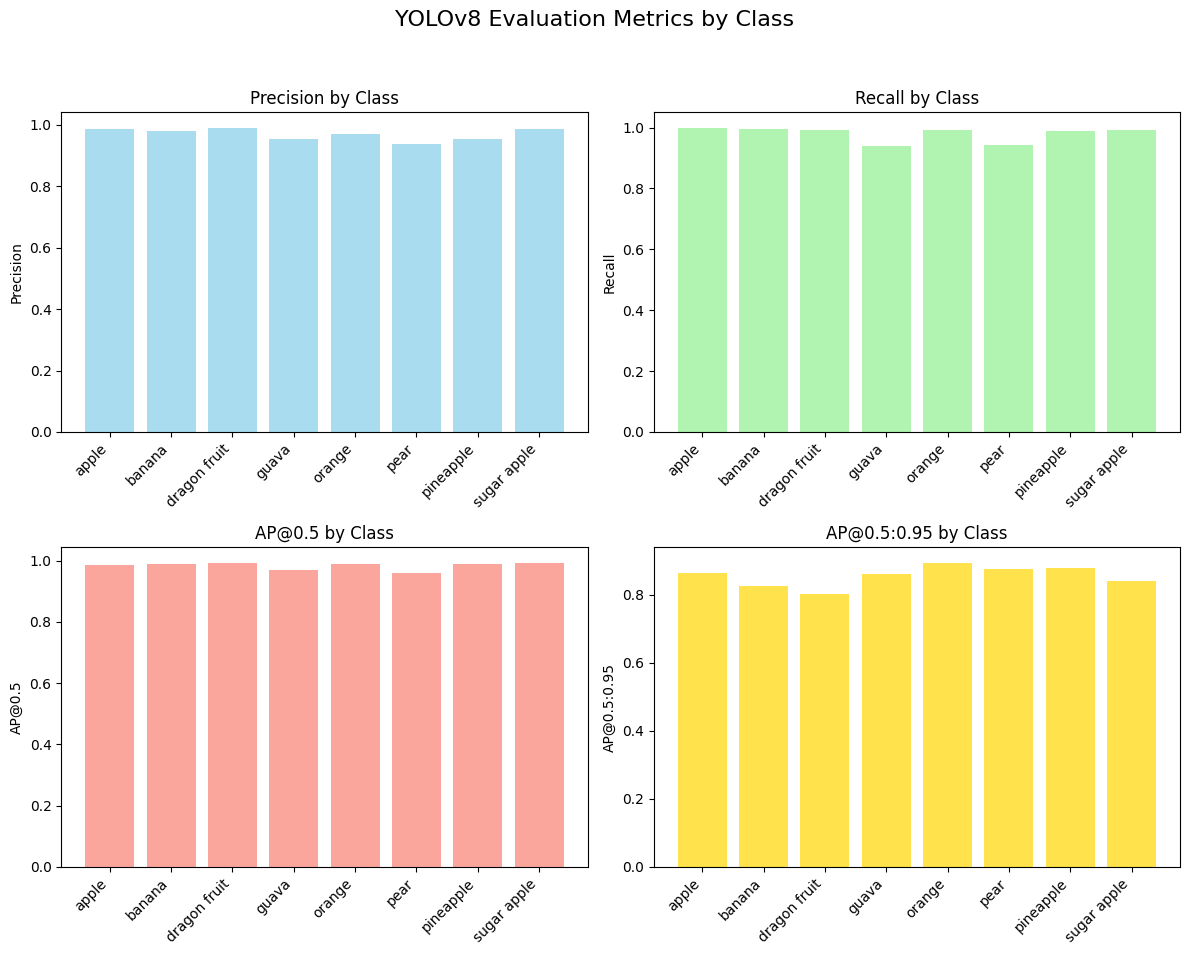

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Run validation and gather metrics
results = trained_model.val()

# Retrieve metrics
mean_ap_50 = results.box.map50  # Mean AP@0.5
mean_ap_5095 = results.box.map  # Mean AP@0.5:0.95
precision = results.box.mp  # Mean Precision
recall = results.box.mr  # Mean Recall
f1_score = results.box.f1  # F1 Score for each class

# Metrics for individual classes
maps = results.box.maps  # mAP values for each class
precisions = results.box.p  # Precision for each class
recalls = results.box.r  # Recall for each class
ap_50s = results.box.ap50  # AP@0.5 for each class (direct access)
ap_5095s = results.box.ap  # AP@0.5:0.95 for each class (direct access)

# Class names (assume you already have fruit_classes)
fruit_classes = ['apple', 'banana', 'dragon fruit', 'guava', 'orange', 'pear', 'pineapple', 'sugar apple']

# Print overall metrics
print(f"mAP@0.5: {mean_ap_50:.4f}")
print(f"mAP@0.5:0.95: {mean_ap_5095:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score (Mean): {f1_score.mean():.4f}\n")  # Mean F1 Score

# Print per-class metrics
print("Per-Class Metrics:")
for idx, name in enumerate(fruit_classes):
    print(f"{name} - AP@0.5: {ap_50s[idx]:.4f}, AP@0.5:0.95: {ap_5095s[idx]:.4f}, Precision: {precisions[idx]:.4f}, Recall: {recalls[idx]:.4f}, F1 Score: {f1_score[idx]:.4f}")

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("YOLOv8 Evaluation Metrics by Class", fontsize=16)

# Precision
axs[0, 0].bar(fruit_classes, precisions, color='skyblue', alpha=0.7)
axs[0, 0].set_title("Precision by Class")
axs[0, 0].set_ylabel("Precision")
axs[0, 0].set_xticks(range(len(fruit_classes)))
axs[0, 0].set_xticklabels(fruit_classes, rotation=45, ha='right')

# Recall
axs[0, 1].bar(fruit_classes, recalls, color='lightgreen', alpha=0.7)
axs[0, 1].set_title("Recall by Class")
axs[0, 1].set_ylabel("Recall")
axs[0, 1].set_xticks(range(len(fruit_classes)))
axs[0, 1].set_xticklabels(fruit_classes, rotation=45, ha='right')

# AP@0.5
axs[1, 0].bar(fruit_classes, ap_50s, color='salmon', alpha=0.7)
axs[1, 0].set_title("AP@0.5 by Class")
axs[1, 0].set_ylabel("AP@0.5")
axs[1, 0].set_xticks(range(len(fruit_classes)))
axs[1, 0].set_xticklabels(fruit_classes, rotation=45, ha='right')

# AP@0.5:0.95
axs[1, 1].bar(fruit_classes, ap_5095s, color='gold', alpha=0.7)
axs[1, 1].set_title("AP@0.5:0.95 by Class")
axs[1, 1].set_ylabel("AP@0.5:0.95")
axs[1, 1].set_xticks(range(len(fruit_classes)))
axs[1, 1].set_xticklabels(fruit_classes, rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show